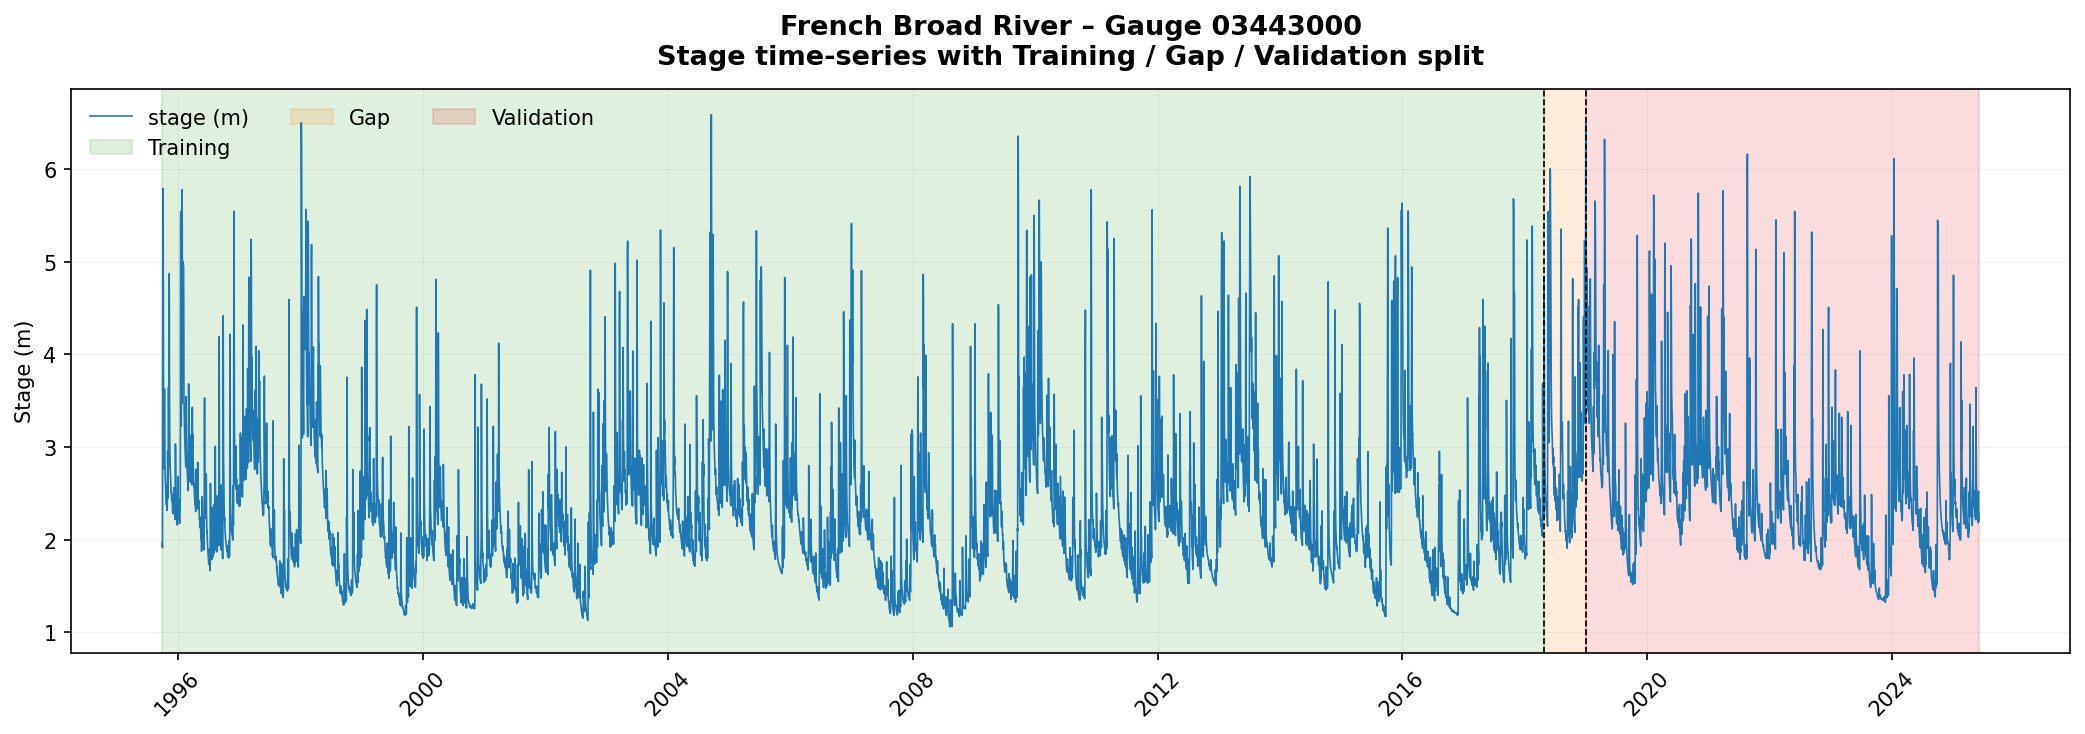

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter

# ---- 1. read & prepare ------------------------------------------------------
df = pd.read_csv("data/combined_dataset.csv", parse_dates=["datetime"])
df.set_index("datetime", inplace=True)

# date cut-offs you already used in the notebooks
train_end = pd.Timestamp("2018-04-21")
gap_start = pd.Timestamp("2018-04-22")      # the day after train_end
val_start = pd.Timestamp("2019-01-01")

# ---- 2. plot ----------------------------------------------------------------
fig, ax = plt.subplots(figsize=(14,5), dpi=150)

ax.plot(df.index, df["stage_m"], lw=0.8, color="#1f78b4", label="stage (m)")

# colour-coded periods  (alpha ≈ 0.15 looks nice in print)
ax.axvspan(df.index.min(), train_end,           color="#33a02c", alpha=0.15,
           label="Training")
ax.axvspan(gap_start,       val_start-pd.Timedelta(days=1),
           color="#ff7f00", alpha=0.15, label="Gap")
ax.axvspan(val_start,       df.index.max(),     color="#e31a1c", alpha=0.15,
           label="Validation")

# vertical guide lines (optional but helps the eye)
for d in [train_end, val_start]:
    ax.axvline(d, color="k", ls="--", lw=0.8)

# ---- 3. cosmetics -----------------------------------------------------------
ax.set_title("French Broad River – Gauge 03443000\nStage time-series with Training / Gap / Validation split",
             fontsize=13, weight="bold", pad=12)
ax.set_ylabel("Stage (m)")

ax.legend(frameon=False, ncol=3, loc="upper left")

# compact x-axis
ax.xaxis.set_major_formatter(DateFormatter("%Y"))
plt.xticks(rotation=45)

ax.grid(alpha=0.3, lw=0.3)
plt.tight_layout()
plt.show()

# ---- 4. export for thesis --------------------------------------------------
# Uncomment the line below to save the figure as a high-resolution PNG
# fig.savefig("fig_02_timeseries_split.png", dpi=300, bbox_inches="tight")


In [6]:
# ⬇ run this in the same env where you trained the model
from tensorflow.keras.models import load_model
from tensorflow.keras.utils  import plot_model

model = load_model("models/best_multivariate_combined_model.keras")  # or best_univariate_model.keras
plot_model(model,
           to_file   = "lstm_encoder_decoder.png",
           show_shapes = True,   # prints (batch, time-steps, features)
           dpi         = 200)    # 300 if you need print-ready


You must install pydot (`pip install pydot`) for `plot_model` to work.
